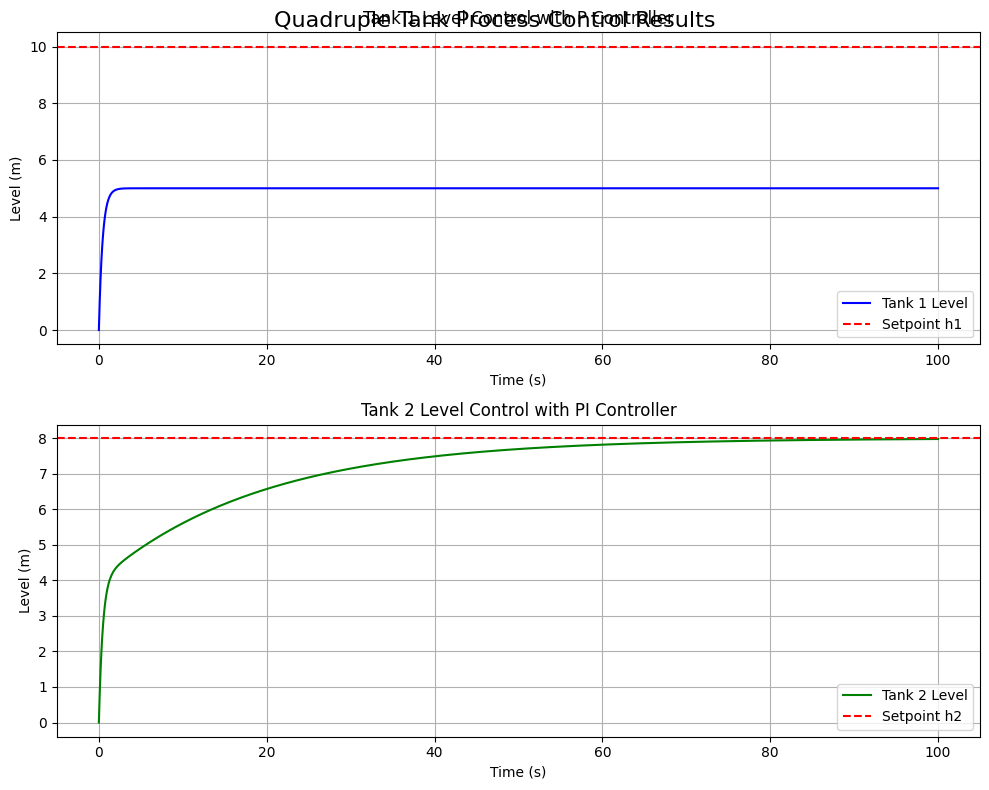

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define simulation parameters
T_final = 100  # Simulation time in seconds
dt = 0.1       # Time step
t = np.arange(0, T_final + dt, dt)  # Time vector

# Define system parameters for the quadruple tank
A1 = 1.0  # Area of tank 1 (m^2)
A2 = 1.0  # Area of tank 2 (m^2)
A3 = 1.0  # Area of tank 3 (m^2)
A4 = 1.0  # Area of tank 4 (m^2)

# Initialize tank levels
h1 = np.zeros(len(t))  # Tank 1 level
h2 = np.zeros(len(t))  # Tank 2 level

# Desired set points for tank levels
h1_setpoint = 10.0  # Setpoint for Tank 1
h2_setpoint = 8.0   # Setpoint for Tank 2

# Controller parameters
Kp = 1.0  # Proportional gain
Ki = 0.1  # Integral gain

# Initialize error and integral error for PI controller
integral_error_h1 = 0.0
integral_error_h2 = 0.0

# Simulate the quadruple-tank process
for i in range(1, len(t)):
    # Calculate errors
    error_h1 = h1_setpoint - h1[i-1]
    error_h2 = h2_setpoint - h2[i-1]

    # P Controller for Tank 1
    P_control_h1 = Kp * error_h1  # Control signal for tank 1

    # PI Controller for Tank 2
    integral_error_h1 += error_h1 * dt
    PI_control_h2 = Kp * error_h2 + Ki * integral_error_h2  # Control signal for tank 2
    integral_error_h2 += error_h2 * dt

    # Calculate the tank levels dynamics (simplified model)
    h1[i] = h1[i-1] + (P_control_h1 / A1 - h1[i-1]) * dt  # Simplified dynamics for tank 1
    h2[i] = h2[i-1] + (PI_control_h2 / A2 - h2[i-1]) * dt  # Simplified dynamics for tank 2

    # Additional dynamics for tanks 3 and 4 can be included if needed

# Plot results
plt.figure(figsize=(10, 8))

# Plot for Tank 1
plt.subplot(2, 1, 1)
plt.plot(t, h1, 'b-', linewidth=1.5, label='Tank 1 Level')
plt.axhline(y=h1_setpoint, color='r', linestyle='--', label='Setpoint h1')
plt.title('Tank 1 Level Control with P Controller')
plt.xlabel('Time (s)')
plt.ylabel('Level (m)')
plt.legend()
plt.grid()

# Plot for Tank 2
plt.subplot(2, 1, 2)
plt.plot(t, h2, 'g-', linewidth=1.5, label='Tank 2 Level')
plt.axhline(y=h2_setpoint, color='r', linestyle='--', label='Setpoint h2')
plt.title('Tank 2 Level Control with PI Controller')
plt.xlabel('Time (s)')
plt.ylabel('Level (m)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.suptitle('Quadruple Tank Process Control Results', fontsize=16)
plt.show()
